# COGS 108 - Final Project Team 40

# Overview ***

*Fill in your overview here*
*Include 3-4 sentences summarizing your group’s project*

# Names

- Fenglin Zhang
- Justin Villafuerte
- Natapong Stephen Jarrell
- Ananya Narurkar
- Arvind Saripalli

# Group Members IDs ***

- A15624955
- A14675207
- A14929717
- A13520437
- A14981787

# Research Question

Can we predict future gasoline prices in the United States using indicators of the US economy? What are some measures that are correlated with United States gas prices?

## Background and Prior Work (give citations also maybe the how to use arima)

Economic forecasting is a common predictive technique applied to different economic measures to help policy-makers decide how to adjust different parameters so that it grows the economy. It is also used by corporations and investors to make business decisions. In this project, we want to create a model that forecasts gas prices, something very relevant to almost everyone. We have a 2-fold objective:
- Analyze how the state of the US economy affects gas prices.
- Try to predict gas prices from different indicators of economic condition. 

There are a lot of variables that drive petroleum prices, they group into the following categories:
- Supply driven changes: the supply chain of oil includes extraction, transportation, and distribution. Increases in supply will likely lead to decreases in prices.
- Demand driven changes: during periods of inflation, the disposable income of consumers will increase. This will likely drive up automobile sales and subsequently gas prices. They are also more likely to use their cars more often for purposes such as shopping. We expect the inverse to happen during periods of deflation.

We’ve chosen to use a few measures to act as our indicators: Dow Jones, S&P 500, and NASDAQ.  The Dow Jones Industrial Average (DJIA) is an index of 30 of the largest publicly traded companies on the American Stock Exchange. This sum is used as a gauge of the industrial sector of the American economy, but is often influenced by political changes and things that could lead to economic harm. The S&P 500 Index stands for Standard & Poor’s 500 Index Definition. It is a weighted index of the 500 biggest US public companies. The larger market share a company has, the more weight it has in the S&P 500. Finally, the NASDAQ composite index is another very broad weighted index reported every second. It takes into account many industries, like finance, technology, utilities, and more. 

Here are some examples ([1](https://www.nber.org/papers/w14450), [2](https://www.nber.org/papers/w17891), [3](https://files.stlouisfed.org/files/htdocs/publications/review/06/11/Kliesen.pdf)) of research papers that try to predict gas prices or are using similar data to come to different conclusions that we drew as inspiration for this project.

# Hypothesis


We expect to be able to fit an accurate model to historical gasoline prices. We also expect that gasoline prices may be highly correlated with various measures of the economy as well as google trends data. We believe this to be the case because gasoline is just another product who's price will rise and fall in accordance with how the economy is doing and that will allow us to predit its price using economic measures. We expect that if these measures are predictive then they are also highly correlated to gas prices.

# Datasets *** (List features in the dataset)

## Gas Prices Dataset

The US Energy Information Administration ([EIA](https://www.eia.gov)) provides data for gasoline prices in the United States. Our goal in this project is to use this dataset to predict future Gas Prices.

- Dataset Name: Weekly Retail Gasoline and Desiel Prices from the US Energy Information Administration 
- Link to the dataset: [Gas prices dataset](https://www.eia.gov/dnav/pet/pet_pri_gnd_dcus_nus_m.htm)
- Number of observations: 1361 weekly data points from 1993 to 2019.

## S&P 500

The S&P 500 which is a stock that measures 500 large companies and is used as a measure of the strength of the economy. The dataset goes as far back as 1950-01-03 to present day and has measures for everyday that the stock market was open and has values for Open, High, Low, Close, Adj Close.

- Dataset Name: S&P 500
- Link to the dataset: [Yahoo Finance S&P](https://finance.yahoo.com/quote/%5EGSPC/history?period1=-630950400&period2=1556262000&interval=1d&filter=history&frequency=1d)
- Number of observations: ~17000 data points

## NASDAQ

The NASDAQ dataset contains values for Open, High, Low, Close, Adj Close, and Volume on a daily basis from 1971 to present.

- Dataset Name: NASDAQ 100 stock data
- Link to the dataset: [UCSD CSE Dataset](http://cseweb.ucsd.edu/~yaq007/NASDAQ100_stock_data.html)
- Number of observations: ~12000 data points from Feb 1971 to present.

## Dow Jones Industrial Average

The [Dow Jones Industrial Average](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average) is a stock market index that indicates the value of 30 large, publicly owned companies based in the United States, and how they have traded in the stock market during various periods of time. The dataset that we found from Yahoo Finance containes weekly measures of the Dow Jones Industrial Averiage from January 1985 to the present. We take this data as a crude estimation of [how the economy is doing](https://www.forbes.com/sites/mikepatton/2016/01/27/the-dow-jones-industrial-average-and-gdp-from-1930-to-2015/#6f3faf23067d).

- Dataset Name: Dow Jones Industrial Average
- Link to the dataset: [Yahoo Finance DJIA](https://finance.yahoo.com/quote/%5EDJI/history?period1=475833600&period2=1555398000&interval=1mo&filter=history&frequency=1mo)
- Number of observations: Weekly data since 1985 is ~1700 data points

## Google Trends Data

Google trends is a service from Google that provides insight into popularity of search terms on Google search. For this project, we queried relative popularity over time of some specified search terms. For example, we retrieved relative popularity of the search term *Gas prices* monthly starting from Jan 1st 2004 until present.


- Dataset Name: Google Trends
- Link to the dataset: [Google Trends](http://trends.google.com/), [Pytrends API wrapper](https://github.com/GeneralMills/pytrends)
- Number of observations: Depends on the keyword being queried. Typically monthly data from Jan 1st 2004 which is ~185 data points per query.

## Combining Our Data ***

We use the datasets are largely separately in this project with the exception of finding correlation between economic measures and gas prices. When combining data, we take into account the different granularities and time ranges in orer to make a fair comparison of data.

# Setup ***

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import datetime

# Gas Prices Dataset
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import month_plot, plot_acf, plot_pacf
from pandas.tools.plotting import autocorrelation_plot

# S&P 500

# NASDAQ

# DJIA

# Google Trends
from pytrends.request import TrendReq
from graphviz import Digraph
from collections import deque
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# ARIMA

ModuleNotFoundError: No module named 'pytrends'

# Data Cleaning ***

What methods did you use to analyze your data? Briefly explain what steps you had to take
before you were able to use the datasets you chose to answer your question of interest.
- How 'clean' is the data?
- What did you have to do to get the data into a usable format?
- What pre-processing steps that were required for your methods (for example, checking data distributions
and performing any transformations that may be required)

## Gas Prices Dataset

In [ ]:
#parsing excel file and renaming columns
file = pd.ExcelFile("future_gas_folder/data/GAS.xls")
df_gas= file.parse('Data 1', header=2, ncolumns=2) 
df_gas = df_gas[['Date', 'Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)']]
df_gas = df_gas.rename(index=str,
    columns={"Weekly U.S. All Grades All Formulations Retail Gasoline Prices  (Dollars per Gallon)": "gas_price"})

df_gas_adj = pd.read_csv("future_gas_folder/data/gas_inflation_adjusted.csv")
df_gas_adj = df_gas_adj[['Month', 'Real Values']]
df_gas_adj = df_gas_adj.rename(index=str, columns={'Month':'Date', 'Real Values':'adjusted price'})
                           
#dropping NaNs and convert index to datetime
df_gas.dropna(axis=0, inplace=True)
df_gas['Date'] = pd.to_datetime(df_gas.Date)
df_gas.set_index('Date',  inplace=True)

df_gas_adj['Date'] = pd.to_datetime(df_gas_adj.Date)
df_gas_adj.set_index('Date',  inplace=True)
df_gas_adj.sort_index(ascending=True, inplace = True)

## S&P 500

In [7]:
df_sp500 = pd.read_csv('future_gas_folder/data/S&P500.csv')
df_sp500 = df_sp500[['Date','Open', 'Close', 'Adj Close']]

In [15]:
df_sp500.head()

,Date,Open,Close,Adj Close
Date,,,,
1950-01-03,1/3/1950,16.66,16.66,16.66
1950-01-04,1/4/1950,16.85,16.85,16.85
1950-01-05,1/5/1950,16.93,16.93,16.93
1950-01-06,1/6/1950,16.98,16.98,16.98
1950-01-09,1/9/1950,17.08,17.08,17.08


Let's take a look at the data

### Drop empty columns

In [16]:
def drop_empty_from_col(col_name, df):
     null = any(df[col_name].isnull())
     if null:
         print("Removing null entries from {} Stocks".format(col_name))
         df = df.dropna()  

     assert not null

In [17]:
#drop empty columns in open, close, and adj close
drop_empty_from_col('Open', df_sp500)
drop_empty_from_col('Close', df_sp500)
drop_empty_from_col('Adj Close', df_sp500)

NaN entries could mess up our analysis as we are using the value of the stocks therefore we want to remove them from the table. Luckily there were no NaN values in the table.

### Convert date column to pandas datetime

In [18]:
df_sp500.index = pd.DatetimeIndex(df_sp500.Date)

We do this because we are doing a time analysis and the pandas datetime object has a lot of useful features or us to use.

### Describe Dataset

In [19]:
df_sp500.describe()

,Open,Close,Adj Close
count,17441.000000,17441.000000,17441.000000
mean,578.714198,578.842952,578.842952
std,690.878183,690.984350,690.984350
min,16.660000,16.660000,16.660000
25%,86.029999,86.029999,86.029999
50%,167.100006,167.119995,167.119995
75%,1098.839966,1099.229980,1099.229980
max,2936.760010,2939.879883,2939.879883


From this description we can see that the Close values and the Adj Close values average out to the be the same through time. We can also see that the Open values closely follow the Close values. We see that generally the Open values are smaller than the close values which suggests that in general the stock opens lower and closes higher. 

This makes us want to look and see if there are any values in these two columns (Close and Adj Close) that differ.

In [20]:
df_sp500.loc[df_sp500['Close'] != df_sp500['Adj Close']]

,Date,Open,Close,Adj Close
Date,,,,


From this we see that there is no difference between the close values and the adjusted close.

## NASDAQ

The provided data from UCSD is very clean, but we go through the data cleaning steps as a precaution.

In [3]:
nasdaq = "future_gas_folder/data/NASDAQ.csv"
df_nasdaq = pd.read_csv(nasdaq)

In [4]:
#drop uneccesary columns
df_nasdaq.drop('High', axis = 1, inplace = True)
df_nasdaq.drop('Low', axis = 1, inplace = True)
df_nasdaq.drop('Volume', axis = 1, inplace = True)

In [5]:
df_nasdaq.head()

,Date,Open,Close,Adj Close
0,1971-02-05,100.000000,100.000000,100.000000
1,1971-02-08,100.839996,100.839996,100.839996
2,1971-02-09,100.760002,100.760002,100.760002
3,1971-02-10,100.690002,100.690002,100.690002
4,1971-02-11,101.449997,101.449997,101.449997


Let's take a look at the data

### Convert date column to pandas datetime

In [6]:
df_nasdaq.index = pd.DatetimeIndex(df_nasdaq.Date)

### Drop empty columns

In [18]:
#drop empty columns in open, close, and adj close
drop_empty_from_col('Open', df_nasdaq)
drop_empty_from_col('Close', df_nasdaq)
drop_empty_from_col('Adj Close', df_nasdaq)

### Describe dataset

In [9]:
df_nasdaq.describe()

,Open,Close,Adj Close
count,12168.000000,12168.000000,12168.000000
mean,1633.183298,1632.965611,1632.965611
std,1807.721775,1807.523459,1807.523459
min,54.869999,54.869999,54.869999
25%,237.900002,237.900002,237.900002
50%,798.429993,799.279999,799.279999
75%,2388.755005,2380.719910,2380.719910
max,8150.850098,8164.000000,8164.000000


We see that the open, close, and adjacent close values are all very similar, and since the granularity for the data is daily, we will opt to just use the open values from here.

## Dow Jones Industrial Average

In [21]:
df_dji = pd.read_csv("future_gas_folder/data/DJI.csv") ## Reading DJI
df_dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000
1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000
2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000
3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000
4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000


Similarly to NASDAQ, the various measures the are provided in the full DJIA dataset are very similar to one another. We choose to use the close values as a result

In [31]:
df_dji = df_dji[['Date', 'Close']]
df_dji.index = pd.DatetimeIndex(df_dji.Date)

### Drop empty columns

In [32]:
drop_empty_from_col('Close', df_dji)

## Google Trends Data

The data provided by [pytrends](https://github.com/GeneralMills/pytrends) is very clean as it is a wrapper for the Google Trends API that provides pandas dataframes for queried information. Nevertheless, we check to make sure that the requested data is indeed clean.

### Setup a payload for 'Gas prices' in the US 

In [29]:
pytrends = TrendReq(hl='en-US', tz=360)

In [30]:
kw = "Gas prices"
kw_list = [kw]
pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='US', gprop='')

In [31]:
# Get the gasoline interest dataframe.
interest_df = pytrends.interest_over_time()
interest_df.head()

,Gas prices,isPartial
date,,
2004-01-01,4,False
2004-02-01,6,False
2004-03-01,10,False
2004-04-01,11,False
2004-05-01,32,False


#### What do the values here represent?
From google trends: "Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

### Check for null entries

In [32]:
has_null = any(interest_df[kw].isnull())
if has_null:
    print("Null entries found... removing null entries")
    interest_df = interest_df.dropna()
    has_null = any(interest_df['Gas prices'].isnull())
    
if has_null:
    print("The data frame had null entries that were removed")
else:
    print("No null entries found!")

No null entries found!


### Check that there is consistent time granularity between rows

In [33]:
for i in range(interest_df.shape[0] - 1):
    entry_time_difference = interest_df.index[i + 1] - interest_df.index[i]
    x = list(entry_time_difference.components)
    assert sum(x) == max(x)

# A sample difference in time between rows.
print("Time granularity is approximately:", entry_time_difference)

Time granularity is approximately: 30 days 00:00:00


# Data Analysis & Results ***

## Exploratory Data Analysis***

- What distributions do your variables take?
- Are there any outliers?
- Relationship between variables?

### Gas Prices Dataset ***

### Data Exploration

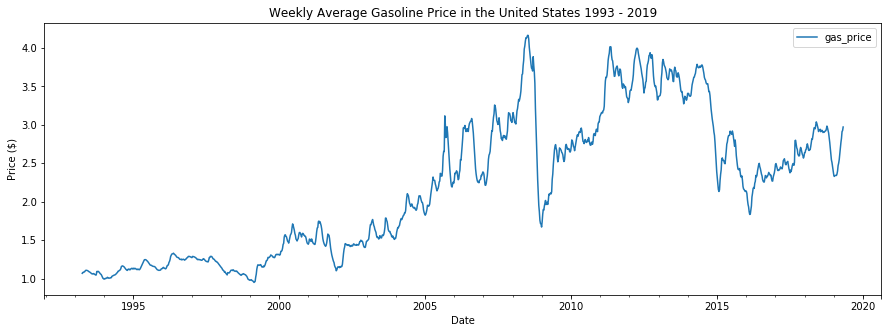

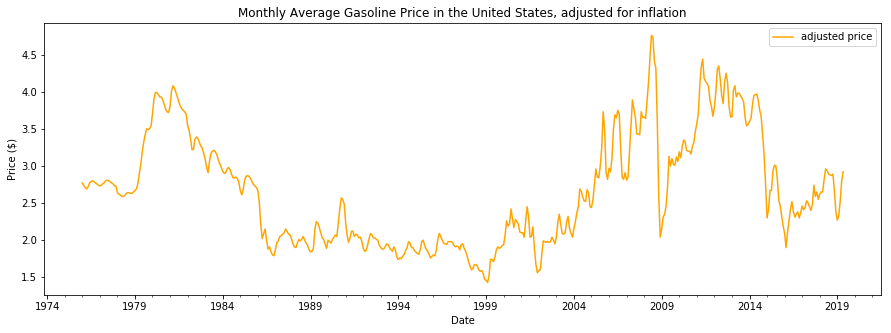

In [3]:
#Plotting
df_gas.plot(figsize = (15, 5))
plt.title('Weekly Average Gasoline Price in the United States 1993 - 2019')
plt.ylabel('Price ($)');
plt.xlabel('Date');

df_gas_adj.plot(figsize = (15, 5), color = 'orange')
plt.title('Monthly Average Gasoline Price in the United States, adjusted for inflation')
plt.ylabel('Price ($)');
plt.xlabel('Date');

We can draw some interesting observations from this plot:
* Slow gradual increase of prices
* Spike and dip at random intervals
* A large dip roughly around the time of the 2008 financial crisis, enforcing our hypothesis that gas prices are related to the state of the US economy. 
* There seems to be an annual spike of varying sizes

 We already know that the series is going to be a heteroscedastic and autocorrelated time series, but let's plot it to confirm.

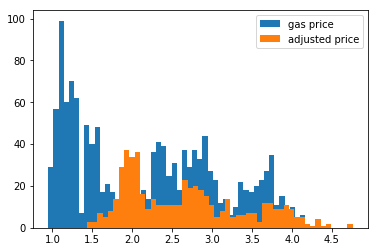

In [4]:
plt.hist(df_gas['gas_price'], 50, label = 'gas price');
plt.hist(df_gas_adj['adjusted price'], 50, label = 'adjusted price');
plt.legend(loc='best');

As exepcted, this is nowhere near a normal distribution.

Let's group by weeks & month to see if there are any seasonal patterns

In [5]:
month_avg = df_gas.groupby(df_gas.index.month).mean()
week_avg = df_gas.groupby(df_gas.index.week).mean()

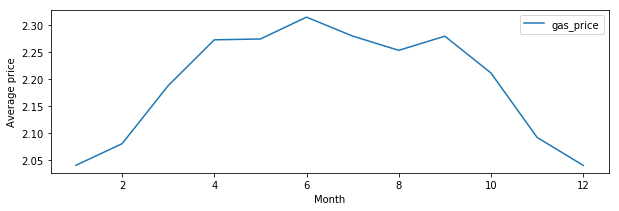

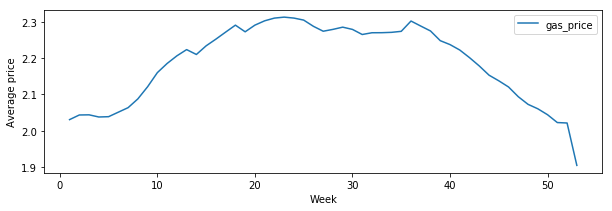

In [6]:
month_avg.plot(figsize = (10, 3))
plt.ylabel('Average price');
plt.xlabel('Month');

week_avg.plot(figsize = (10, 3))
plt.ylabel('Average price');
plt.xlabel('Week');

Comparing week and month averages, it seems that prices go up in the summer. To be more rigorous, we dicided to plot a monthly histogram of prices:

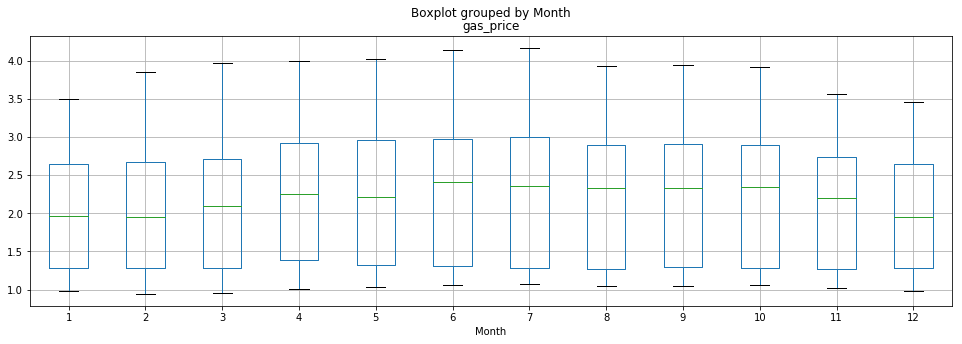

In [7]:
df_seasonal = df_gas.copy()
df_seasonal['Month'] = df_seasonal.index.month
df_seasonal.boxplot(by='Month', figsize = (16, 5));
plt.xlabel('Month');

Very interesting, we can see a graduating increasing in gas prices peaking in the summer, and decrease in prices bottoming in winter. Although there are slight variations in other month, the median price for June is higher than all other months. We explore this further by using a linear decomposition of our time series into a trend component and a seasonality component. The model (from statsmodels library) is as follows:
<h2><center>Y(t) = T(t) + S(t) + ε </center></h2>
Where Y is the dependent variable, T & S are trend & seasonality, and episilon is a random noise term.

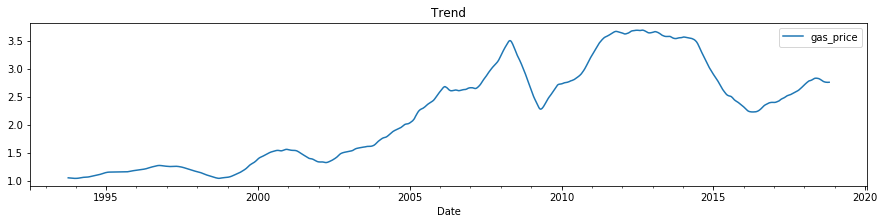

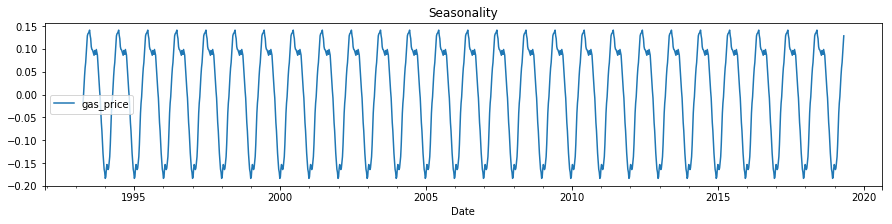

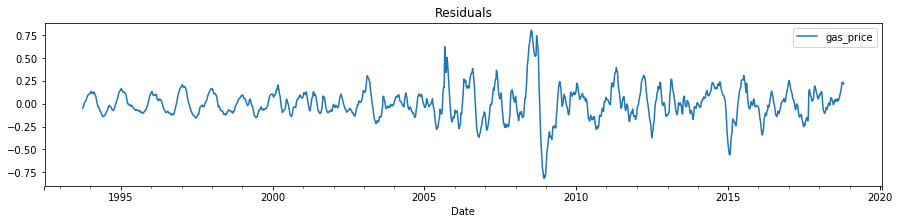

In [8]:
#fig, ax = plt.subplots(figsize=(16, 5))
result = seasonal_decompose(df_gas, model='additive')
result.trend.plot(figsize=(15, 3), title = 'Trend');
result.seasonal.plot(figsize=(15, 3), title = 'Seasonality');
result.resid.plot(figsize=(15, 3), title = 'Residuals');

We can see that stastmodels succefully decomposed our series into a trend component that models the gradual changes as well as a seasonality component with a frequency of one year, with the peak value at mid-year (June), which is what we predicted. We now assess how good is this decomposition. 
From the plot above, the residuals look pretty similar to white noise, we plot it to confirm:

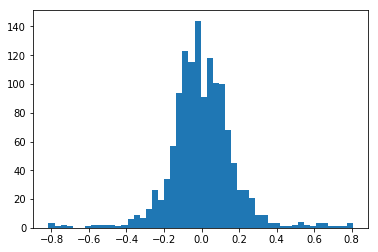

In [13]:
plt.hist(result.resid['gas_price'], 50);

We can see that the residuals are normally distributed, which implies that its probably close to white noise. Unfortunately, we cannot plot the autocorrelation function here because there are too many NaN values in the residual dataframe. We now reconstruct the time series from trend + seasonality and compare it with the original time series.

In [42]:
gas_reconstructed = pd.concat([result.seasonal.add(result.trend, fill_value=0), result.observed], axis=1)
gas_reconstructed.columns = ['reconstructed', 'observed']
rmse = np.sqrt(np.mean(result.resid['gas_price']**2))

Root-Mean Squared Error : 0.17223427610846742


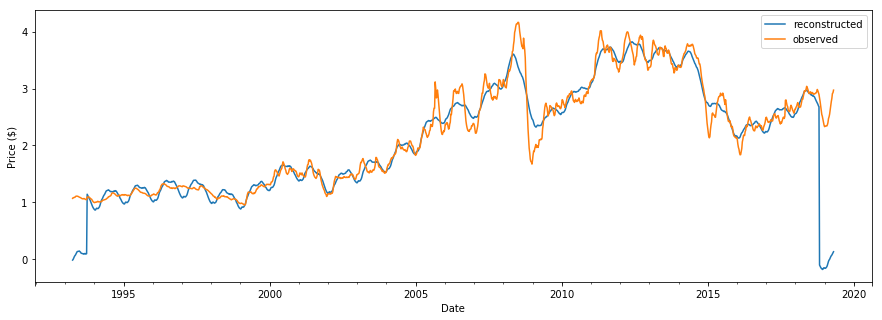

In [44]:
gas_reconstructed.plot(figsize = (15, 5))
plt.ylabel('Price ($)');
plt.xlabel('Date');
print('Root-Mean Squared Error : {}'. format(rmse))

This is a pretty good fit, although we can see that there are some components not explained by this decomposition.

### S&P 500

#### Plotting and resampling

Here, we resample the S&P500 data points to average by week in order to be able to actually plot them efficiently. Doing so also smooths out granularity irregularities at the daily level because the stock market closes on holidays and the weekends.

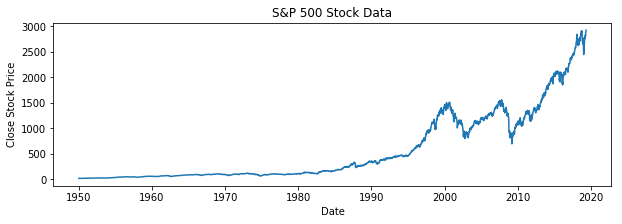

In [27]:
df_sp500_weekly = df_sp500['Close'].resample('W').mean()

plt.figure(figsize=(10, 3))
plt.plot(df_sp500_weekly.index, df_sp500_weekly)
plt.xlabel('Date')
plt.ylabel('Close Stock Price')
plt.title('S&P 500 Stock Data')
plt.show()

We only model Close here because of how closely Open follows the Close price. Later we will look at the Open price in more detail.

From this graph we can see that this stock has grown over time. This makes sense since the economy has grown since the 1950s and the value of the companies that this stock measures has grown since then as well. There a few major dips in the graph which should be represenative of economic crashes. We believe this to be true due the economic crash in 2008 and the represenative fall in the graph at the same time.

### NASDAQ

#### Plotting and resampling

Here, we resample the NASDAQ data points to average by week in order to be able to actually plot them efficiently. We see that the NASDAQ open stock prices have been increasing over time with corresponding local rises and dips in the market.

In [28]:
df_nasdaq_weekly = df_nasdaq['Open'].resample('W').mean()

plt.figure(figsize=(10, 3))
plt.plot(df_nasdaq_weekly.index, df_nasdaq_weekly)
plt.xlabel('Date')
plt.ylabel('Open Stock Price')
plt.title('NASDAQ Stock Data')
plt.show()

NameError: name 'df_nasdaq' is not defined

### Dow Jones Industrial Average

#### Plotting

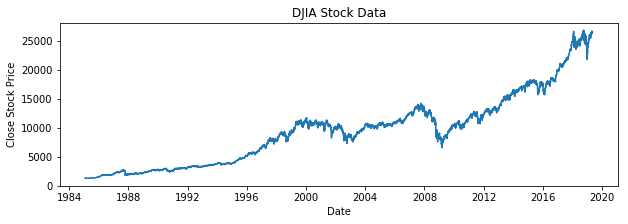

In [35]:
plt.figure(figsize=(10, 3))
plt.plot(df_dji.index, df_dji['Close'])
plt.xlabel('Date')
plt.ylabel('Close Stock Price')
plt.title('DJIA Stock Data')
plt.show()

In [36]:
df_dji.describe()

,Close
count,8636.000000
mean,9500.461189
std,6096.591724
min,1242.050049
25%,3566.230042
50%,9870.679688
75%,12453.862549
max,26828.390625


#### Structure: 
DOW Jones Industrial Average Data came from a CSV. Each observation is in a seperate row. There is daily a data observation for approximately 70% of days in the 34 year span of 1985 to 2019. The data is 70% of days because it is only collected on the weekdays. The data is not spread across multiple tables.

#### Granularity: 
Each row (observation) represents the market value of the Dow Jones at the end of the weekday. The data is not summarized or aggregated, but instead used as a time-series model for its rate of change.

#### Scope: 
Data is comprehensive of the last 34 years, with the exception of weekend observations because the stock market is open 9:30am - 4pm Eastern, Monday - Friday.

#### Temporality: 
The date in the dataset represents the market value of the DOW at 4pm on weekdays (closing time). It is represented in YYYY-MM-DD. We plan to use this data as the x axis of our plot.

#### Faithfulness: 
The data is reasonable and to be expected. The data was measured by a computer and remains consistent across time. There are no obvious signs of falsification or any reason to disbelieve the data.

### Google Trends Data

#### Typical Values for relative interest in the term 'Gas Prices'

In [19]:
interest_df.describe()

,Gas prices
count,185.000000
mean,13.529730
std,11.233705
min,5.000000
25%,8.000000
50%,10.000000
75%,14.000000
max,100.000000


We see that on average, the relative interest in 'Gas prices' is 13.5. It is important to note that this is unitless and represents a some normalized value in the range [0, 100], although Google states that a score of 0 means that there isn't enough data for a term. We see that the minimum value for this dataset is 5, so there was always enough data for this particular search term.

Raw search values are preferable but Google does not provide this information for privacy reasons.

#### Visualizing relative interest in term 'Gas Prices' over time

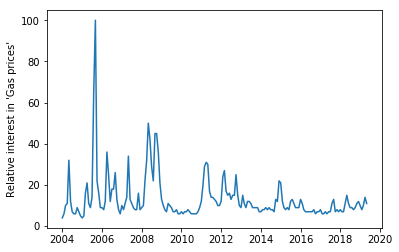

In [34]:
plt.plot(interest_df[kw])
plt.ylabel('Relative interest in \'{}\''.format(kw))
plt.show()

We see that the most queried period of time for 'Gas prices' was in 2005 with a second after the recession in 2008.

#### Using related queries as feedback to get more data

Google trends also provides keywords that it thinks are relevant to the provided keyword. This is useful because we can gather multiple keywords' worth of data and combine them to reduce the variance in any one search result.

In [26]:
def get_related_for_keyword(kw):
    kw_list = [kw]
    pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='US', gprop='')
    related_df = pytrends.interest_over_time()
    return pytrends.related_queries()

In [27]:
# Modify these to grow the size of the tree and to choose a different starting keyword
start_kw = 'Gas prices'
num_iters = 5
k = 3 # Top-k related keywords to find per word


graph_dict = {}
q = deque()
q.append(start_kw)

for i in range(num_iters):
    # get the next keyword
    kw = q.popleft()
    print("Finding related terms to {}...".format(kw))
    
    # Get related keywords for given keyword
    related = get_related_for_keyword(kw)

    # Get the top k related keywords
    top_k = list(related[kw]['top'][:k]['query'].values)
    
    # Add to graph data dict
    if kw not in graph_dict:
        graph_dict[kw] = []
    graph_dict[kw] = top_k
    
    q.extend(top_k)
print("Done")

Finding related terms to Gas prices...
Finding related terms to gas near me...
Finding related terms to gas prices near me...
Finding related terms to gas price...
Finding related terms to near me gas station...
Done


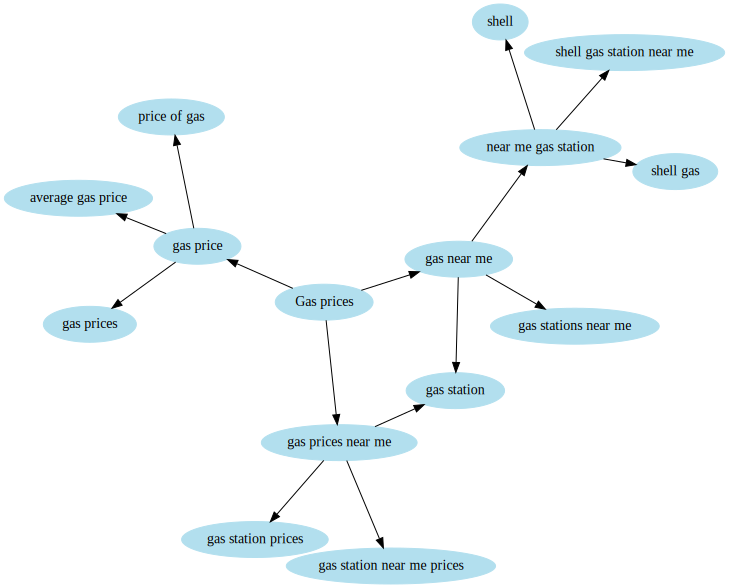

In [28]:
dot = Digraph(engine='neato')
dot.node_attr.update(color='lightblue2', style='filled')
dot.edge_attr.update(len='1.6')

for kw in graph_dict:
    dot.node(kw, kw)
    for child in graph_dict[kw]:
        dot.node(child, child)
        dot.edge(kw, child, length='1')
dot

From this graph, we can use any of the suggested keywords in combination with the existing keyword. We didn't include this in the project as it is somewhat tangential but this can be included in a future iteration that focuses more explicitly on the relationship between google trends data and gas prices.

## ARIMA

We have adopted the ARIMA model since we are predicting a variable into the future using all the information we have on the past. Multiple linear regression will not work well for this approach for three reasons:
1. Our time series violates the assumption on homoscedacity, its mean and variance chances constantly across time.
2. It's also autocorrelated, which means that the residuals from a OLS fit would not be linear.
3. Multiple linear regression assumes no temporality which is a key component of forecasting. It also cannot predict into the future

$$ Y_t = a + \mu + \sum_{i = 1}^{p}b_iY_{t-i} + \sum_{j=1}^{q}d_j\varepsilon _{t-j} + \epsilon $$

It has three parameters:
* P: Number of AR regressors (A linear regression of Y with its past values).
* D: Order of differcing. This is to remove any linear trends.
* Q: Number of MA regressors (A linear regression of Y with its error values).

### Manual Parameter Selection

#### Order of Differencing (d)

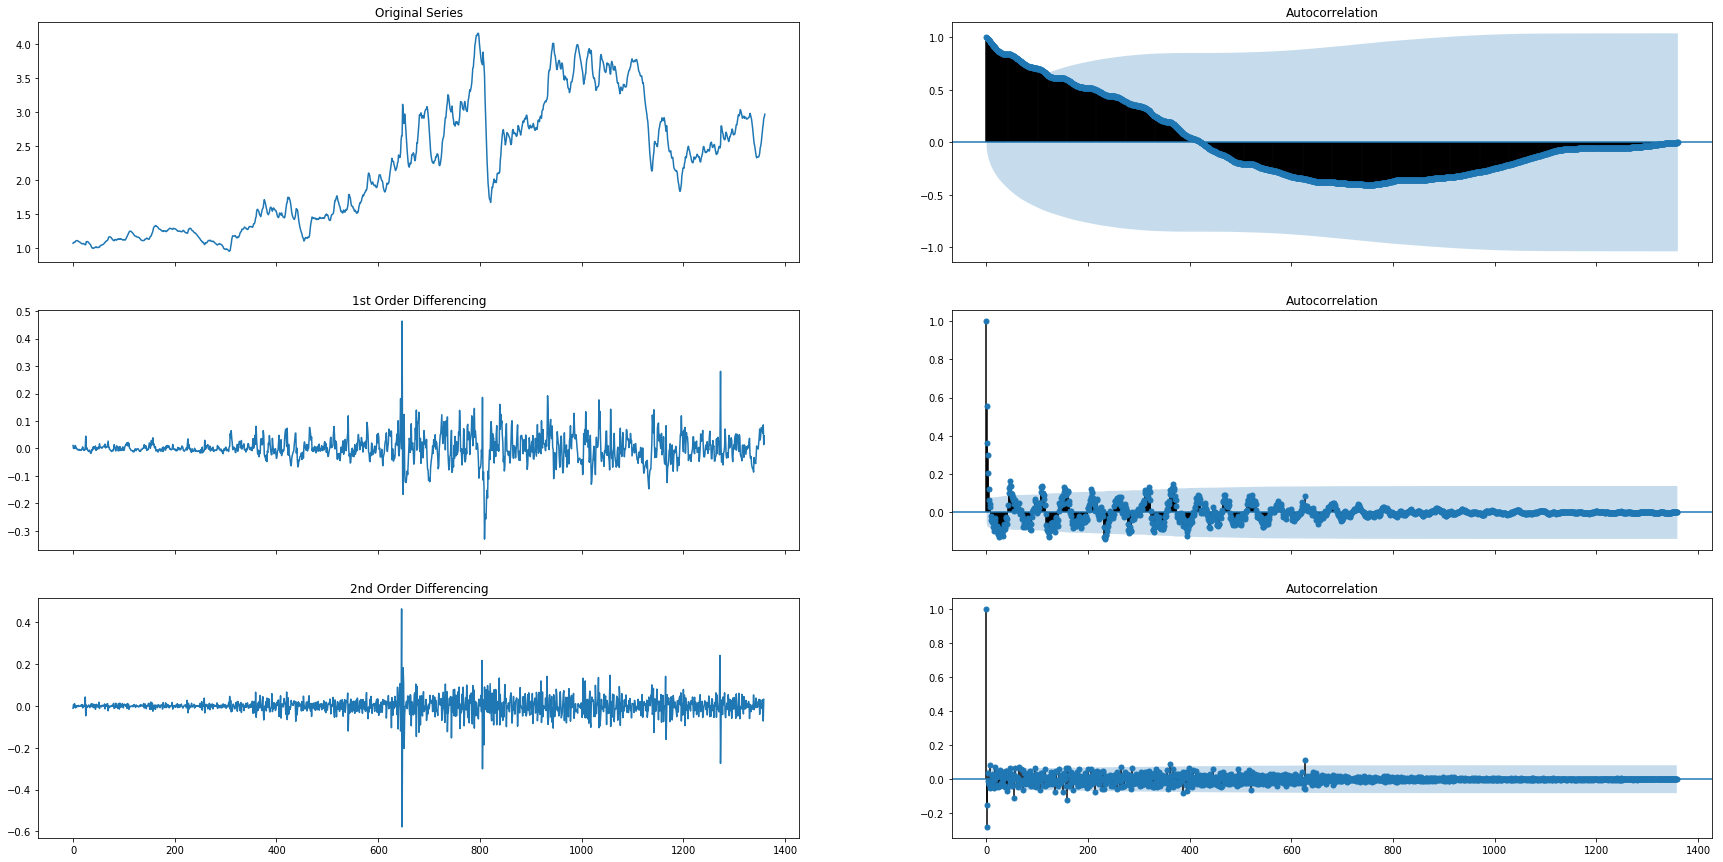

In [45]:
fig, axes = plt.subplots(3, 2, figsize = (30,15), sharex=True)
axes[0, 0].plot(df_gas.values); axes[0, 0].set_title('Original Series')
plot_acf(df_gas.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(df_gas.values, axis = 0)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(df_gas.values, axis = 0), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(np.diff(np.diff(df_gas.values, axis = 0), axis = 0)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(np.diff(df_gas.values, axis = 0), axis = 0), ax=axes[2, 1])

plt.show()

In [46]:
adf_dif0 = adfuller(df_gas['gas_price'])
print('ADF Statistic: %f' % adf_dif0[0], 'p-value: %f' % adf_dif0[1])
adf_dif1 = adfuller(np.diff(df_gas['gas_price'], axis = 0))
print('ADF Statistic: %f' % adf_dif1[0], 'p-value: %f' % adf_dif1[1])
adf_dif2 = adfuller(np.diff(np.diff(df_gas['gas_price'], axis = 0),axis = 0))
print('ADF Statistic: %f' % adf_dif2[0], 'p-value: %f' % adf_dif2[1])

ADF Statistic: -2.056594 p-value: 0.262322
ADF Statistic: -10.797902 p-value: 0.000000
ADF Statistic: -12.242284 p-value: 0.000000


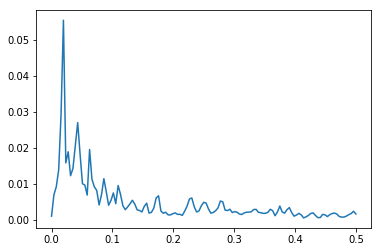

In [47]:
freqs, pw = sp.signal.welch(np.diff(df_gas['gas_price'].values))
plt.plot(freqs, pw)

We do an ad-fuller test to determine whether the series is stationary, based on above, 1st order differencing is more than enough.

#### Number of lags in the AR model (p)

We plot the PACF of the 1st-differenced prices to see how well lagged observations explain variations in the data

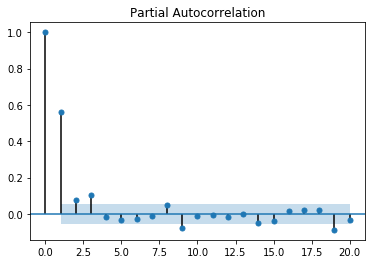

In [48]:
plot_pacf(np.diff(df_gas['gas_price'], axis = 0), lags = 20);

We can see from this plot that lags 1, 2, 3 , and 4 are significantly above the 95% confidence interval.

#### Number of lagged errors in the MA model (q)

We plot ACF to see how well lagged errors explain variations in the data

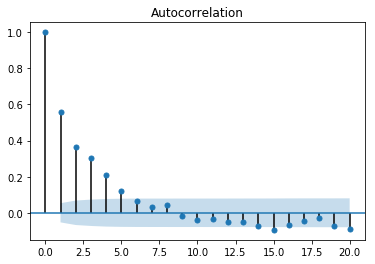

In [49]:
plot_acf(np.diff(df_gas['gas_price'], axis = 0), lags = 20);

### Fitting

In [50]:
order = np.array([2,1,1])
model = ARIMA(df_gas, order=order)
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Allen Zhang\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)
C:\Users\Allen Zhang\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.gas_price   No. Observations:                 1360
Model:                 ARIMA(2, 1, 1)   Log Likelihood                2470.672
Method:                       css-mle   S.D. of innovations              0.039
Date:                Mon, 03 Jun 2019   AIC                          -4931.344
Time:                        12:22:13   BIC                          -4905.268
Sample:                    04-12-1993   HQIC                         -4921.582
                         - 04-29-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0015      0.003      0.520      0.603      -0.004       0.007
ar.L1.D.gas_price     0.9368      0.139      6.760      0.000       0.665       1.208
ar.L2.D.gas_price    -0.

                 0
count  1360.000000
mean     -0.000005
std       0.039345
min      -0.353095
25%      -0.016618
50%      -0.001532
75%       0.014106
max       0.452933


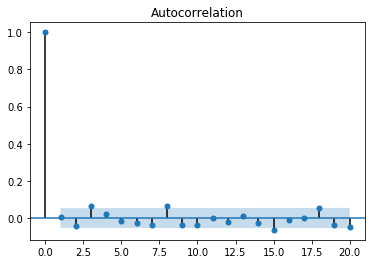

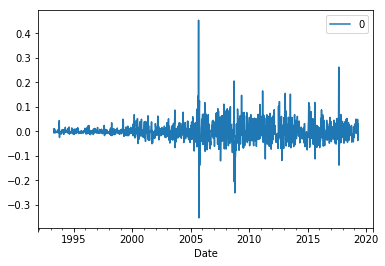

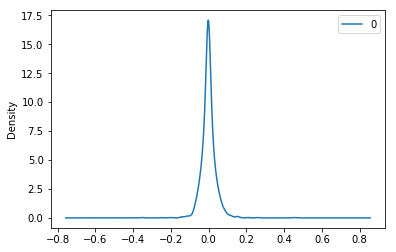

In [53]:
residuals = pd.DataFrame(model_fit.resid)
plot_acf(residuals, lags = 20);
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

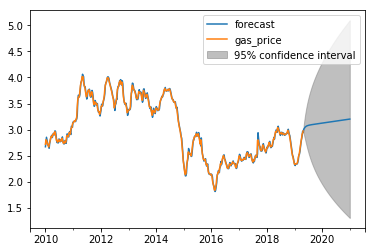

In [54]:
#plt.figure(figsize=(20,10))
model_fit.plot_predict('2010', '2021', dynamic=False)
plt.show()

Seasonal ARIMA

- https://github.com/gmonaci/ARIMA/blob/master/time-series-analysis-ARIMA.ipynb
- https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

In [65]:
mod = sm.tsa.statespace.SARIMAX(df_gas,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

C:\Users\Allen Zhang\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                          gas_price   No. Observations:                 1361
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                2131.153
Date:                            Mon, 03 Jun 2019   AIC                          -4254.306
Time:                                    12:32:05   BIC                          -4233.519
Sample:                                04-05-1993   HQIC                         -4246.517
                                     - 04-29-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7168      0.022     33.233      0.000       0.675       0.759
ma.L1         -0.1890      0.024   

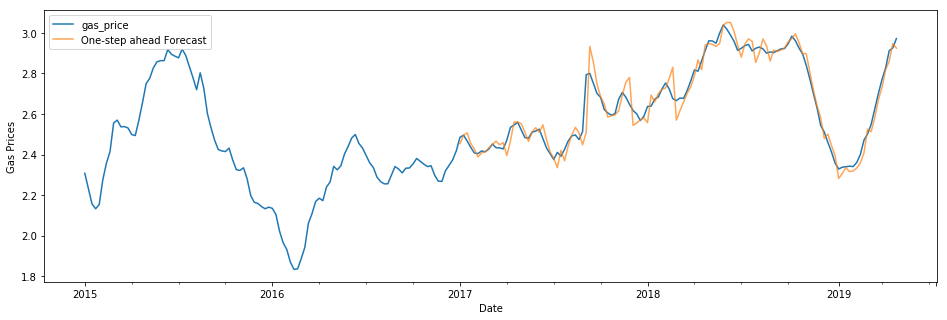

In [78]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-02'), dynamic=False)
ax = df_gas['2015':].plot(label='observed', figsize=(16,5))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.set_xlabel('Date')
ax.set_ylabel('Gas Prices')
plt.legend()
plt.show()

To-Do: training & validation
if time permits: bagging

## Automatic Parameter Selection

## Cross Correlation

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*